# Final Project Title(TBD)

- Nicolas Colebank
- Andrew Consiglio
- Cristina De La Torre

In [1]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
import statsmodels.formula.api as smf

# Abstract

TO DO

# Research Question

Is there a relationship between extreme weather events and climate opinions from 2018-2023 across states in the United States? Does this relationship vary in regards to state?
<br><br>

We define climate opinion to be based upon the responses of adults to the following questions: 
- Is global warming is affecting the weather? 
- Are you worried about global warming?
- Do you support regulating CO2 as a pollutant?
- Should my governor do more to address global warming? 
- Do you discuss global warming at least occasionally? 

# Background (WIP)

> Why is this problem relevant? Or, what inspired you to investigate this problem?

Global warming and the effects of environmental issues at large remain relevant especially with recent patterns of natural disasters and climate change in the United States. Yet, developing effective ways with which to address the impacts of these issues remain challenging at a national scale. We want to assess this challenge by investigating possible factors that may explain the difficulty in addressing environmental issues across the country. More specifically we will be investigating these factors in relation to local extreme weather events.

 The complexity of this problem may be shaped by polarized public perception and local experiences, and so the factors we will assess will focus on local sentiment and socioeconomic elements. Analyzing sentiment such as beliefs, risk perceptions, policy support, and behaviors at a local level might lead to a richer understanding of diverse opinions. To develop larger contextual comprehension, analyzing trends of local natural disasters and environmental issues like fracking and pollution may be useful along with an investigation of local governments, their policies, and access to resources.
 
It is through an analysis of extreme weather and these factors that we would like to work towards developing effective ways to address the impact of climate change at the federal level. Hence, exploring the relationship between severe weather, public opinion, and socioeconomic disparities is particularly important because it can provide a contextual framework with which to tackle the challenge of developing effective solutions to mitigate the effects of environmental issues. 

Before doing further exploration, it is important to understand the subject matter: extreme weather events and climate opinion. Extreme weather events can take on many forms, but usually falls into seven categories: thunderstorms, tornadoes, floods, lightning, hail, wind, and winter weather. All have potentially catastrophic consequences depending on the severity of the event. Some events, like thunderstorms, are much more common but typically less damaging. Events like tornadoes, on the other hand, are more rare yet much more dangerous. All of these events occur in the United States, and seem to be increasing in frequency in recent years. To learn more about severe weather, visit the National Severe Storms Laboratory page [Severe Weather 101](https://www.nssl.noaa.gov/education/svrwx101/#:~:text=severe%20winter%20weather.-,Thunderstorms,floods%2C%20lightning%20and%20damaging%20winds.).

Climate opinion has become an increasingly hot topic of discussion in recent years. The effects of global warming are becoming more apparent, and with this it becomes more influential on the day-to-day life of Americans. Investigating the current climate opinion across the United States can be telling of how much climate change has had an effect on their lives currently. Although research shows the worst effects are yet to come, problems like an increasing amount of extreme weather events are pressing issues. Climate opinion can provide insight into how extreme weather events have changed stance on climate change across the USA.


# Hypothesis

There exist a relationship between recent climate opinions and extreme weather events such that as the frequency of extreme weather events increases so does negative opinions on climate.

(TO DO Rationale) This is due to previously mentioned study in which __ . 

# Data(WIP)

>Where did you get the data from?<br>
>Description of the data

There are a few datasets that would prove useful for making a statistical analysis to help answer this problem. For one, Yale has a dataset containing climate opinion data in the U.S. down to the county, where respondents were asked questions such as “Is climate change happening?” or questions about who should act and what policies should be implemented to affect global warming. Additionally, the National Oceanic and Atmospheric Administration (NOAA) has data on extreme weather events throughout the U.S., dating back to 1950. Harvard’s county-level dataset on U.S. Senate voting can be used to see how partisan voting influences climate change as well. All of these datasets can be downloaded as CSV files. We will use python’s pandas library to merge these datasets together, which can be done by using county name + state, which when combined is always a unique identifier. For the dataset on extreme weather events, the data can only be downloaded by type of weather event. We will pick the most common extreme weather events and use these in our main dataset.


- Yale dataset:
    - sample size>31000


## Data Cleaning and Transformation

In [2]:
#for filtering out non states from event data
state_names = [
    "ALABAMA", "ALASKA", "ARIZONA", "ARKANSAS", "CALIFORNIA", "COLORADO", "CONNECTICUT",
    "DELAWARE", "FLORIDA", "GEORGIA", "HAWAII", "IDAHO", "ILLINOIS", "INDIANA", "IOWA",
    "KANSAS", "KENTUCKY", "LOUISIANA", "MAINE", "MARYLAND", "MASSACHUSETTS", "MICHIGAN",
    "MINNESOTA", "MISSISSIPPI", "MISSOURI", "MONTANA", "NEBRASKA", "NEVADA", "NEW HAMPSHIRE",
    "NEW JERSEY", "NEW MEXICO", "NEW YORK", "NORTH CAROLINA", "NORTH DAKOTA", "OHIO", "OKLAHOMA",
    "OREGON", "PENNSYLVANIA", "RHODE ISLAND", "SOUTH CAROLINA", "SOUTH DAKOTA", "TENNESSEE",
    "TEXAS", "UTAH", "VERMONT", "VIRGINIA", "WASHINGTON", "WEST VIRGINIA", "WISCONSIN", "WYOMING"
]

### Climate Opinion Data

In [3]:
yale_climate = pd.read_csv('data/yale_climate.csv')
yale_climate.head()

,geotype,geoid,geoname,varname,x2010,x2011,x2012,x2013,x2014,x2015,x2016,x2017,x2018,x2019,x2020,x2021,x2022,x2023
0,state,1,Alabama,affectweather,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.66,49.22,53.33,53.64,49.63,50.28
1,state,2,Alaska,affectweather,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57.48,54.94,60.92,62.25,59.17,60.66
2,state,4,Arizona,affectweather,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.32,58.40,63.55,64.22,61.73,63.12
3,state,5,Arkansas,affectweather,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53.17,50.78,55.72,55.89,51.26,52.43
4,state,6,California,affectweather,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67.21,64.51,69.28,70.14,67.47,68.39


In [4]:
yale_climate = yale_climate[yale_climate['geotype'] == 'state']
yale_climate = yale_climate[['geoname','varname', 'x2018', 'x2019', 'x2020', 'x2021', 'x2022', 'x2023']]

#consistent state names across both datasets
yale_climate['geoname'] = yale_climate['geoname'].str.upper() 
yale_climate.head()

,geoname,varname,x2018,x2019,x2020,x2021,x2022,x2023
0,ALABAMA,affectweather,52.66,49.22,53.33,53.64,49.63,50.28
1,ALASKA,affectweather,57.48,54.94,60.92,62.25,59.17,60.66
2,ARIZONA,affectweather,60.32,58.40,63.55,64.22,61.73,63.12
3,ARKANSAS,affectweather,53.17,50.78,55.72,55.89,51.26,52.43
4,CALIFORNIA,affectweather,67.21,64.51,69.28,70.14,67.47,68.39


In [5]:
melted = pd.melt(yale_climate, id_vars=['geoname', 'varname'], var_name='year', value_name='percentage')
melted['year'] = melted['year'].str.replace('x','').astype(int)
yale_climate = melted
yale_climate.head()

,geoname,varname,year,percentage
0,ALABAMA,affectweather,2018,52.66
1,ALASKA,affectweather,2018,57.48
2,ARIZONA,affectweather,2018,60.32
3,ARKANSAS,affectweather,2018,53.17
4,CALIFORNIA,affectweather,2018,67.21


<br></br>

### Storm Data

In [6]:
df = pd.read_csv('data/storm_dataset2023.csv')
df.head()

,BEGIN_YEARMONTH,BEGIN_DAY,BEGIN_TIME,END_YEARMONTH,END_DAY,END_TIME,EPISODE_ID,EVENT_ID,STATE,STATE_FIPS,...,END_RANGE,END_AZIMUTH,END_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,EPISODE_NARRATIVE,EVENT_NARRATIVE,DATA_SOURCE
0,202310,25,230,202310,27,551,186682,1145781,NORTH DAKOTA,38,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"In late October, a winter storm dumped heavy s...",Public reports 7.5 inches at Black Tiger Bay C...,CSV
1,202310,25,230,202310,27,1437,186682,1145783,NORTH DAKOTA,38,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"In late October, a winter storm dumped heavy s...",Local Police Department relays storm total sno...,CSV
2,202310,25,230,202310,27,1126,186682,1145784,NORTH DAKOTA,38,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"In late October, a winter storm dumped heavy s...",Public reports 10 inches of storm total snowfa...,CSV
3,202310,25,230,202310,27,1301,186682,1145796,NORTH DAKOTA,38,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"In late October, a winter storm dumped heavy s...",Emergency Manager reports 6 inches of storm to...,CSV
4,202310,25,230,202310,27,600,186682,1145884,NORTH DAKOTA,38,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"In late October, a winter storm dumped heavy s...",CoCoRaHS Station ND-GF-23 reports 8.8 inches o...,CSV


In [7]:
event_dfs = []
by_state_dfs = []
def load_storm(year):
    df = pd.read_csv(f'data/storm_dataset{year}.csv')
     #filters out non states
    df = df[df['STATE'].isin(state_names)] 
    #there are multiple events for the same episode, this removes them
    unique = df.drop_duplicates(subset=['STATE_FIPS', 'EPISODE_ID']) 
    agg_funcs = {
        'EVENT_ID': 'count',
        'YEAR': 'first',
    }
    by_state = unique.groupby('STATE').agg(agg_funcs).reset_index()
    by_state = by_state.rename({'EVENT_ID': 'COUNT'}, axis=1)
     #only columns we might use
    events = unique[['STATE', 'EVENT_TYPE', 'YEAR', 'EPISODE_ID', 'EPISODE_NARRATIVE']]
    event_dfs.append(events)
    by_state_dfs.append(by_state)

In [8]:
years = [2018 + i for i in range(6)]
for year in years:
    load_storm(year)

In [9]:
#note: some 'states' on here are not actual states (like Lake Superior) - we will ignore these for now
events_df = pd.concat(event_dfs, axis=0)
event_count_df = pd.concat(by_state_dfs, axis=0)
event_count_df

,STATE,COUNT,YEAR
0,ALABAMA,149,2018
1,ALASKA,68,2018
2,ARIZONA,277,2018
3,ARKANSAS,191,2018
4,CALIFORNIA,337,2018
...,...,...,...
45,VIRGINIA,212,2023
46,WASHINGTON,107,2023
47,WEST VIRGINIA,131,2023
48,WISCONSIN,211,2023


In [10]:
events_df_merged = events_df.merge(yale_climate, how='inner', left_on=['STATE', 'YEAR'], right_on=['geoname','year'])

#data for each event type along with yale climate data
events_df_merged = events_df_merged.drop(columns=['geoname', 'year']) 

In [11]:
event_count_merged = event_count_df.merge(yale_climate, how='inner', left_on=['STATE', 'YEAR'], right_on=['geoname', 'year'])

#data with number of events for each year along with the yale climate data
event_count_merged = event_count_merged.drop(columns=['geoname', 'year']) 

In [12]:
#TODO identify questions and filter dfs for each question

### Missingness

Lets start by looking at the amount of null values per column:

In [13]:
event_count_merged.isnull().sum()

STATE            0
COUNT            0
YEAR             0
varname          0
percentage    3700
dtype: int64

In [14]:
events_df_merged.isnull().sum()

STATE                     0
EVENT_TYPE                0
YEAR                      0
EPISODE_ID                0
EPISODE_NARRATIVE         0
varname                   0
percentage           683607
dtype: int64

For both of the DataFrames in question, there are no null values from the extreme weather event data (at least for the columns of interest). However, there are many null values in the 'percentage' column, suggesting that there are null values from the Yale Climate dataset.

Lets see what the rows with the null values look like:

In [15]:
event_count_merged[event_count_merged['percentage'].isnull()]['varname'].unique()

array(['expOppose', 'generaterenewable', 'generaterenewableOppose',
       'gwvoteimp', 'gwvoteimpOppose', 'president', 'presidentOppose',
       'priority', 'priorityOppose', 'prioritycleanenergy',
       'prioritycleanenergyOppose', 'taxdividend', 'taxdividendOppose',
       'trustclimscisst', 'trustclimscisstOppose', 'prienv',
       'prienvOppose', 'important', 'co2limits', 'co2limitsOppose',
       'supportrps', 'supportrpsOppose'], dtype=object)

These null values look to be tied to specific questions. Depending on what questions are investigated, this could prove to be an issue.

The questions we want to investigate, as mentioned in our research question, are as follows:
- Is global warming is affecting the weather? 
- Are you worried about global warming?
- Do you support regulating CO2 as a pollutant?
- Should my governor be doing more to address global warming?
- Do you discuss global warming at least occasionally? 

Lets filter the dataframes so that only these questions are in the dataset:

In [16]:
#these are the variable names that correspond to these questions; see the 'Metadata' sheet in the file data/YCOM7_publicdata.xlsx
research_questions = ['affectweather', 'worried', 'regulate', 'governor', 'discuss'] 
events_df_merged = events_df_merged[events_df_merged['varname'].isin(research_questions)]
event_count_merged = event_count_merged[event_count_merged['varname'].isin(research_questions)]

In [17]:
events_df_merged.isnull().sum()

STATE                0
EVENT_TYPE           0
YEAR                 0
EPISODE_ID           0
EPISODE_NARRATIVE    0
varname              0
percentage           0
dtype: int64

In [18]:
event_count_merged.isnull().sum()

STATE         0
COUNT         0
YEAR          0
varname       0
percentage    0
dtype: int64

As we can see from the output of the previous two cells, there is no missing data after we filter for the questions of interest. This means that no methods such as mean imputation are necessary to deal with missing data.

# EDA

### Most common weather events by state:

Some states naturally have more extreme weather events because of their geographical location. By analyzing which weather events are most prevalent in each state and matching it with our research on what events are most driven by climate change, we can select the best states to single out when we do our hypothesis testing.

In [19]:
#For each state, here are the counts of each type of weather event
event_counts = events_df.groupby(['STATE', 'EVENT_TYPE']).size().reset_index(name='counts')
event_counts

,STATE,EVENT_TYPE,counts
0,ALABAMA,Coastal Flood,1
1,ALABAMA,Cold/Wind Chill,5
2,ALABAMA,Drought,45
3,ALABAMA,Excessive Heat,11
4,ALABAMA,Flash Flood,89
...,...,...,...
1243,WYOMING,Thunderstorm Wind,198
1244,WYOMING,Tornado,20
1245,WYOMING,Wildfire,22
1246,WYOMING,Winter Storm,176


In [20]:
#Now just the most common weather event for each state
most_common_events = event_counts.loc[event_counts.groupby('STATE')['counts'].idxmax()]
most_common_events

,STATE,EVENT_TYPE,counts
20,ALABAMA,Thunderstorm Wind,393
39,ALASKA,High Wind,149
57,ARIZONA,Flash Flood,308
89,ARKANSAS,Thunderstorm Wind,295
118,CALIFORNIA,High Wind,477
147,COLORADO,Hail,378
177,CONNECTICUT,Thunderstorm Wind,114
196,DELAWARE,Thunderstorm Wind,70
221,FLORIDA,Thunderstorm Wind,514
248,GEORGIA,Thunderstorm Wind,537


### Change in events:
Let's also look at how the number of weather events has changed over time in each state. We'll look at the averages for the first 2 years (2018/2019) vs last 2 years (2022/2023) of our data. While the scope may be small, it gives us some sort of idea of how weather events have been changing by state the past few years.

In [21]:
#Averages of first 2 years
event_years_first = event_count_df[event_count_df['YEAR'].isin([2018, 2019])]
event_years_first = event_years_first.groupby('STATE')['COUNT'].mean().reset_index()
event_years_first

,STATE,COUNT
0,ALABAMA,153.0
1,ALASKA,72.0
2,ARIZONA,245.0
3,ARKANSAS,188.5
4,CALIFORNIA,376.5
5,COLORADO,358.5
6,CONNECTICUT,82.5
7,DELAWARE,28.0
8,FLORIDA,260.0
9,GEORGIA,175.0


In [22]:
#Averages of last 2 years
event_years_second = event_count_df[event_count_df['YEAR'].isin([2022, 2023])]
event_years_second = event_years_second.groupby('STATE')['COUNT'].mean().reset_index()
event_years_second

,STATE,COUNT
0,ALABAMA,176.5
1,ALASKA,135.0
2,ARIZONA,228.0
3,ARKANSAS,201.5
4,CALIFORNIA,388.0
5,COLORADO,351.5
6,CONNECTICUT,59.0
7,DELAWARE,37.5
8,FLORIDA,303.0
9,GEORGIA,184.0


In [23]:
#Differences by state
merged_states = pd.merge(event_years_first, event_years_second, on='STATE', suffixes=('_df1', '_df2'))
merged_states['count_difference'] = merged_states['COUNT_df2'] - merged_states['COUNT_df1']
merged_states = merged_states.sort_values('count_difference', ascending=False)
merged_states
print(merged_states.iloc[:10])

          STATE  COUNT_df1  COUNT_df2  count_difference
42        TEXAS      568.5      802.0             233.5
1        ALASKA       72.0      135.0              63.0
35     OKLAHOMA      205.5      265.0              59.5
27       NEVADA      108.0      156.5              48.5
8       FLORIDA      260.0      303.0              43.0
26     NEBRASKA      251.0      289.5              38.5
17    LOUISIANA      132.0      169.0              37.0
0       ALABAMA      153.0      176.5              23.5
23  MISSISSIPPI      123.5      145.0              21.5
43         UTAH       95.5      116.0              20.5


We see the states that saw a biggest increase in events from first 2 to last 2 years were Texas, Alaska, Oklahoma, Nevada, and Florida.
According to PolicyGenius (https://www.policygenius.com/homeowners-insurance/best-and-worst-states-for-climate-change/) the states that will fare worst in the face of climate change are Florida, Mississippi, Louisiana, Texas, and Arkansas. 4 of these states are in the top 10 of increasing weather events.\
One thing to note is states like Texas that are larger experience more events due to their size, so it's also important to factor in percent change.

In [24]:
#percent_change
merged_states['percent_change'] = (merged_states['COUNT_df2'] - merged_states['COUNT_df1'])/merged_states['COUNT_df1']
merged_states = merged_states.sort_values('percent_change', ascending=False)
print(merged_states.iloc[:10])

          STATE  COUNT_df1  COUNT_df2  count_difference  percent_change
1        ALASKA       72.0      135.0              63.0        0.875000
27       NEVADA      108.0      156.5              48.5        0.449074
42        TEXAS      568.5      802.0             233.5        0.410730
7      DELAWARE       28.0       37.5               9.5        0.339286
35     OKLAHOMA      205.5      265.0              59.5        0.289538
17    LOUISIANA      132.0      169.0              37.0        0.280303
43         UTAH       95.5      116.0              20.5        0.214660
23  MISSISSIPPI      123.5      145.0              21.5        0.174089
18        MAINE       66.0       77.0              11.0        0.166667
8       FLORIDA      260.0      303.0              43.0        0.165385


### Trends in Climate Opinions

Data on climate opinion from the yale 2023 dataset is broken down by percentage of responses that oppose or agree with particular statement. The breakdown for our questions is as follows: 

| Question  | Related `varname` |
| :-------- |:----------------  |
| is global warming is affecting the weather?   | `affectweather`, `affectweatherOppose` |
| Are you worried about global warming?  | `worried`, `worriedOppose`|
| Do you support regulating CO2 as a pollutant? |  `regulate`, `regulateOppose`|
|   Should my governor do more to address global warming?|`governor`, `governorOppose`|
| Do you discuss global warming at least occasionally? | `discuss`, `discussOppose` |

This set of questions comes from five categories of opinions, our analysis of the data would benefit from investigating which questions contribute to trends in extreme weather events the most.

Looking at the unique values within `varname` we can see that each question has a percentage of responses in agreement and a corresponding percentage in opposition **(UPDATE SENTENCE ACCORDINGLY)**. Let us compare the percent distributions for each type of response.

In [25]:
events_df_merged.varname.unique()

array(['affectweather', 'discuss', 'governor', 'regulate', 'worried'],
      dtype=object)

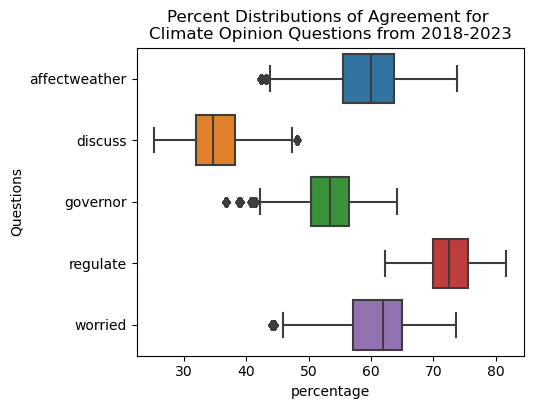

In [26]:
fig, ax = plt.subplots(1, 1, figsize=(5, 4))

sns.boxplot(
    events_df_merged,
    y = "varname",
    x = "percentage",
    ax = ax).set(
    title='Percent Distributions of Agreement for \nClimate Opinion Questions from 2018-2023', 
    ylabel = "Questions"
);

Analyzing the distribution of percentages for the responses in favor of each question it looks like the distribution for `regulate` which is the variable name corresponding to support for regulating CO2 as a pollutant has the highest maximum percentage of support in comparison to other questions. This along with about half of its distribution being high relative to the other distributions.

We can also see that the percent distribution with the most spread is that of `affectweather` which corresponds responses in agreement with the statement of global warming affecting the weather. This illustrates that there are varied responses when it comes to the affects of global warming on weather, something that is worth investigating.

 We can also visualize the percent support for each question relative to each other with the following visualization:

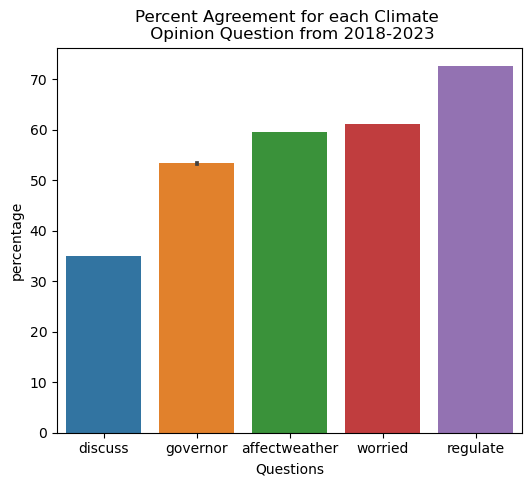

In [27]:
fig, ax = plt.subplots(1, 1, figsize=(6, 5))

sns.barplot( 
    events_df_merged.sort_values('percentage'),
    y = 'percentage', 
    x = 'varname',
    ax = ax).set(
    title='Percent Agreement for each Climate \n Opinion Question from 2018-2023',
    xlabel = "Questions"
);

Relative to each other, it seems the questions with highest percent support, besides `regulate`, are `worried` and `affectweather` closely after. This shows that questions pertaining to **concern, affects, and regulation** are the most supported over defined time period. To a certain extent, this also may imply that questions that deal with beliefs, risk perceptions, and policy are the most supported types.

The plot also demonstrates that `discuss` is the least supported question with a large difference between it and the next lowest percent support for a question. This variable name corresponds to the question of discussion climate change occassionally. 

Analyzing the percent support for these questions over time might prove to be insightful of any significant change. 

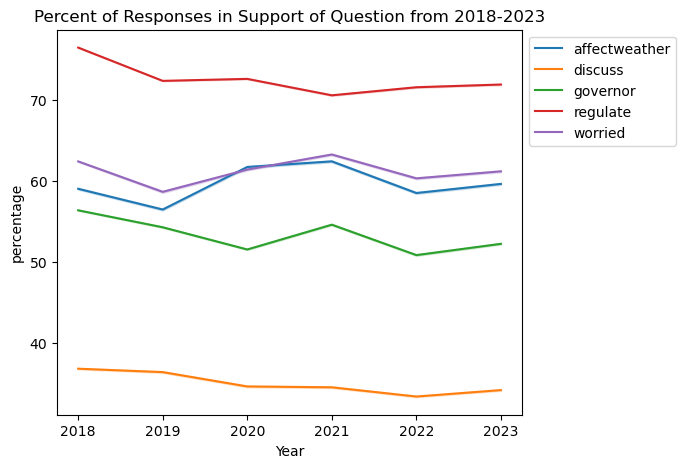

In [28]:
fig, ax = plt.subplots(1, 1, figsize=(6, 5))

sns.lineplot(
    events_df_merged, 
    x = "YEAR", 
    y = "percentage", 
    hue = "varname").set(
    title='Percent of Responses in Support of Question from 2018-2023',
    xlabel = "Year"
)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1));

Most of the percentages in favor of its respective question are lower more recently in comparison to 2018, with exception of `affectweather` and perhaps `worried`. These two exception also seem to follow a similar trend over the years.

The most stagnant percentage support for a question is that of `discuss` which also remains the lowest support across all years. The questions that show the most variation in relation to percent support over the years are `governor`, `affectweather`, and `worried`. 

### Trends in Extreme Weather
To get an overivew extreme weather, we can first analyze the frequency of each type of extreme weather relative to each other within the years of interest.

In [29]:
event_occur = events_df_merged.groupby(["YEAR", "EVENT_TYPE"]).agg(event_count=('STATE', 'count')).reset_index()
event_occur.head()

,YEAR,EVENT_TYPE,event_count
0,2018,Astronomical Low Tide,50
1,2018,Avalanche,40
2,2018,Blizzard,385
3,2018,Coastal Flood,280
4,2018,Cold/Wind Chill,355


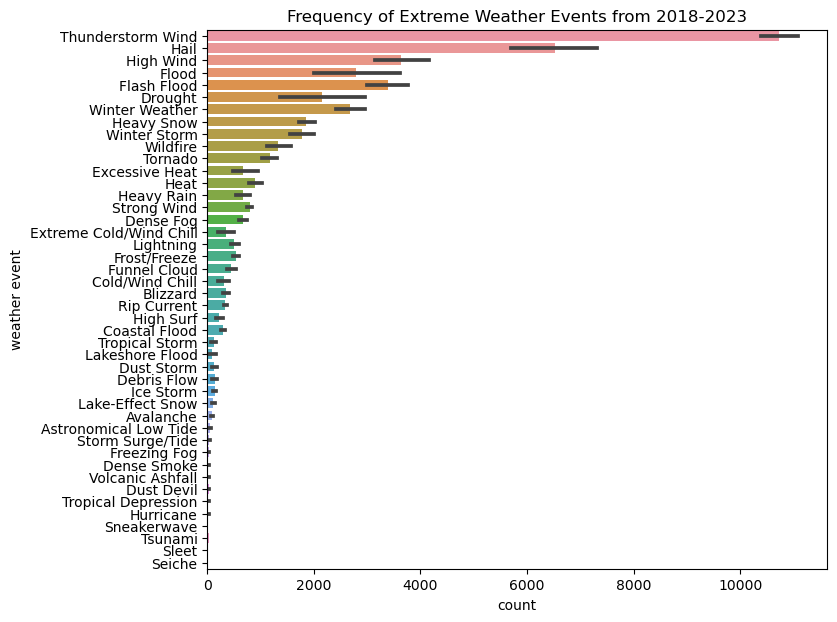

In [30]:
fig, ax = plt.subplots(1, 1, figsize=(8, 7))

sns.barplot(
    event_occur.sort_values("event_count", ascending = False), 
    y = "EVENT_TYPE", 
    x = "event_count",
    orient = "h",  
    ax = ax).set(
    title='Frequency of Extreme Weather Events from 2018-2023',
    xlabel = "count",
    ylabel = "weather event"
);

Although it is difficult to view the frequency of each event within the plot, it illustrates the significant difference between the frequency of `Thunderstorm Wind` in comparison to all other events. 

To get a better sense of the relation between the most frequent weather events besides `Thunderstorm Wind`, the distribution of the following 5 events with the highest recorded frequency are visualized below:

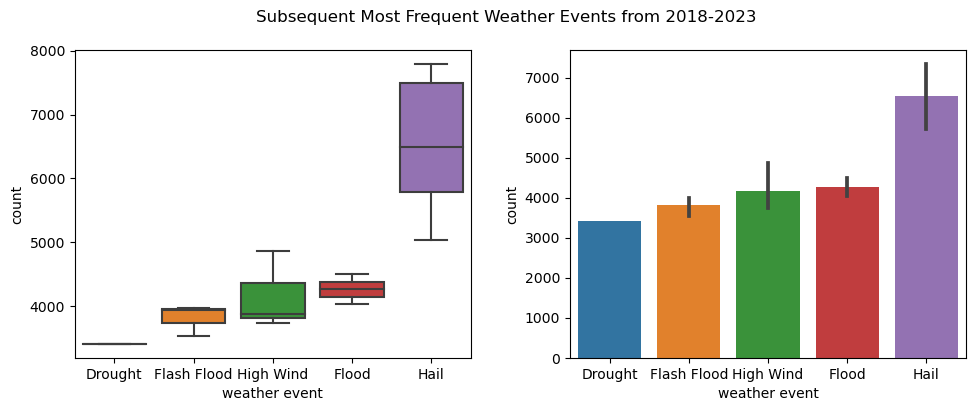

In [31]:
#filter to top occuring 
top_events = event_occur.query("event_count < 8000 and event_count > 3400")

fig, ax = plt.subplots(1, 2, figsize=(11.5, 4))
#boxplot
sns.boxplot(
    top_events.sort_values("event_count"), 
    x = "EVENT_TYPE", 
    y = "event_count",
    ax = ax[0]
).set(
    xlabel = "weather event",
    ylabel = "count"
)

#barplot
sns.barplot(
    top_events.sort_values("event_count"), 
    x = "EVENT_TYPE", 
    y = "event_count",
    ax = ax[1]
).set(
    xlabel = "weather event",
    ylabel = "count"
)

#labels and spacing
plt.subplots_adjust(wspace=0.25)
plt.suptitle('Subsequent Most Frequent Weather Events from 2018-2023');

It can be seen from the plot that most distributions are relatively around the same frequency of occurence except `Hail` with a frequency of large difference. `Hail` also has the most variability in comparison to the frequency of the other weather events.
 
In a similar manner let us investigate events with the lowest recorded occurences over time.The lowest recorded occurences all have only a count of 5 and as such we will not visualize their distributions of their repsective weather events. Instead we can see that the lowest occurence, the weather event, and the year in which it was experienced can be see in the following dataframe.

In [32]:
event_occur.query("event_count <= 5")

,YEAR,EVENT_TYPE,event_count
31,2018,Sneakerwave,5
49,2019,Dense Smoke,5
66,2019,Hurricane,5
73,2019,Sleet,5
114,2020,Sleet,5
189,2022,Lakeshore Flood,5
200,2022,Volcanic Ashfall,5
234,2023,Storm Surge/Tide,5


From this filtered dataset we can see that the smallest frequencies were recorded for `Sneakerweave`, `Dense Smoke`, `Hurricane`, `Sleet`, `Lakeshore Flood`, `Volcanic Ashfall`, and `Storm Surge/Tide`.

It is important to note that these frequencies of weather events are a count in relation to each year, and in being so weather events can be more frequent in some years in comparison to other years. To get an idea of the overall most occuring and least occuring events we can analyze total counts recorded from 2018-2023.

In [33]:
overall_count = (event_occur
                 .groupby('EVENT_TYPE')[['event_count']]
                 .sum()
                 .sort_values('event_count', ascending = False)
                )

overall_count.head()

,event_count
EVENT_TYPE,
Thunderstorm Wind,64335
Hail,39180
High Wind,21770
Flash Flood,20370
Flood,16780


Overall, the top 5 most frequent extreme weather events reflect that of the previous plots. For the weather events with lowest occurences it can be seen that besides previously mentioned events with low frequency, overall `Tsunami` and `Seiche` are the two **least frequent**.

In [34]:
overall_count.tail()

,event_count
EVENT_TYPE,
Hurricane,70
Volcanic Ashfall,60
Sneakerwave,55
Seiche,30
Tsunami,25


<br><br>
To further understand the frequency of events, we can look at any trends over time. To do this we will look at the proportions of events per year.

In [35]:
totals = event_occur.groupby(["YEAR"])['event_count'].sum()

event_occur['event_prop'] = event_occur.event_count / event_occur.YEAR.apply(lambda x: totals.loc[x])
event_occur.head()

,YEAR,EVENT_TYPE,event_count,event_prop
0,2018,Astronomical Low Tide,50,0.001042
1,2018,Avalanche,40,0.000834
2,2018,Blizzard,385,0.008027
3,2018,Coastal Flood,280,0.005838
4,2018,Cold/Wind Chill,355,0.007401


Reevaluating the distribution of extreme weather events as proportions, we can analyze any changes relative to type of extreme weather event from previous analysis.

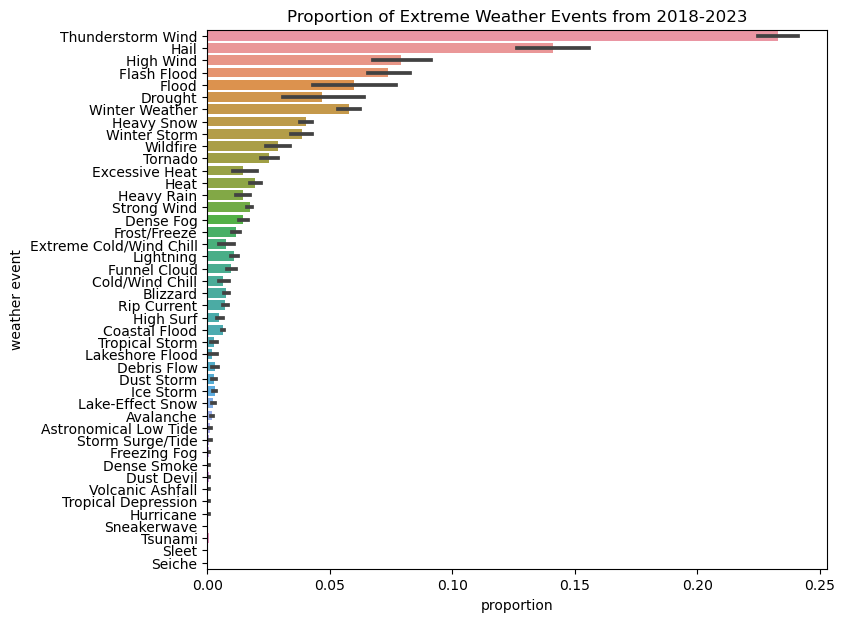

In [36]:
fig, ax = plt.subplots(1, 1, figsize=(8, 7))

sns.barplot(
    event_occur.sort_values("event_prop", ascending = False), 
    y = "EVENT_TYPE", 
    x = "event_prop",
    orient = "h",  
    ax = ax).set(
    title='Proportion of Extreme Weather Events from 2018-2023',
    xlabel = "proportion",
    ylabel = "weather event"
);

`Thunderstorm Wind` still remains the event with highest occurences across the years, let us evaluate these changes over time. 

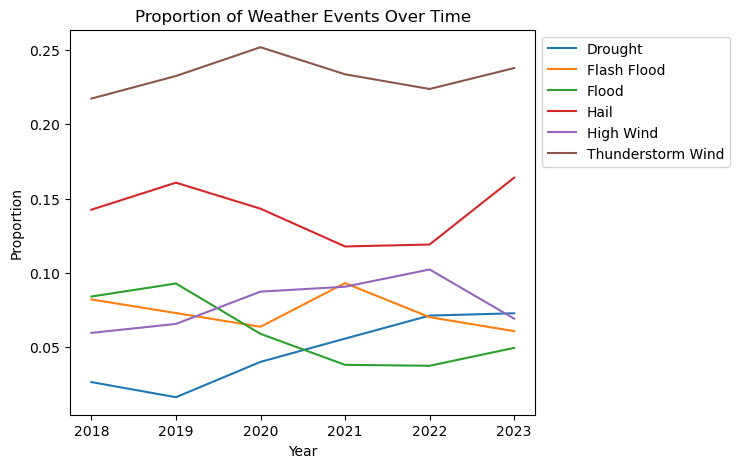

In [37]:
# get events with highest recorded props
top_events = list(event_occur.query("event_prop > 0.07").EVENT_TYPE.unique())

#lineplot
fig, ax = plt.subplots(1, 1, figsize=(6, 5))
sns.lineplot(
    event_occur.query(f'EVENT_TYPE in {top_events}'), 
    x = "YEAR", 
    y = "event_prop", 
    hue = "EVENT_TYPE").set(
    title='Proportion of Weather Events Over Time',
    xlabel = "Year", 
    ylabel= "Proportion"
)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1));

From the plot, it is seen that `Drought`s, `Flash Flood`s, `Flood`s, and `High Wind` all are similar in value of proportional occurence with much overalp throughout the years. The plot also illustrates some fluctuation in `Thunderstorn Wind` which across each year reamins significantly higher than other extreme weather events. 

We can carry out the same analysis for events with low recorded frequencies.

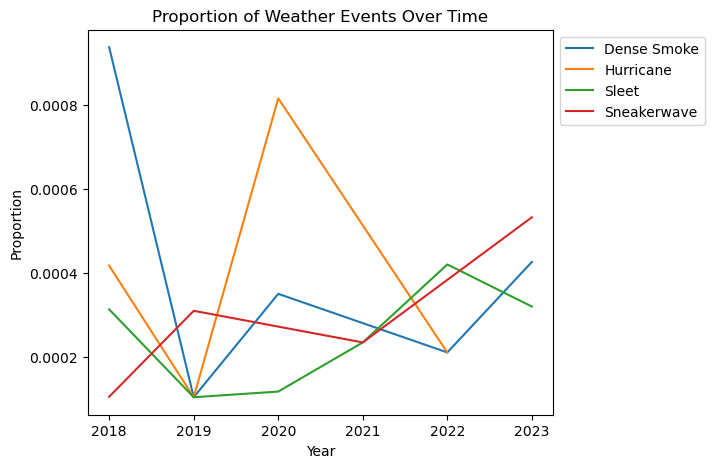

In [38]:
#get events with lowest recorded props
bottom_events = list(event_occur.query("event_prop < 0.0001045").EVENT_TYPE.unique())

#lineplot
fig, ax = plt.subplots(1, 1, figsize=(6, 5))
sns.lineplot(
    event_occur.query(f'EVENT_TYPE in {bottom_events}'), 
    x = "YEAR", 
    y = "event_prop", 
    hue = "EVENT_TYPE").set(
    title='Proportion of Weather Events Over Time',
    xlabel = "Year",
    ylabel = "Proportion"
)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1));

Across years, all events except `Hurricane` all follow an upwards trend, such that their proportional occurences are higher in 2023 than in 2018. Although `Huricane` peaks sharply around 2020 implying significant change, the scale of proportions in plot is very miniscule with a change from a porportion of $0.0008$ to that of less that $0.0002$.

### Relationships between Variables

Is there a relationship between the frequency of extreme weather events, and the percentage of positive responses to statements within questions?

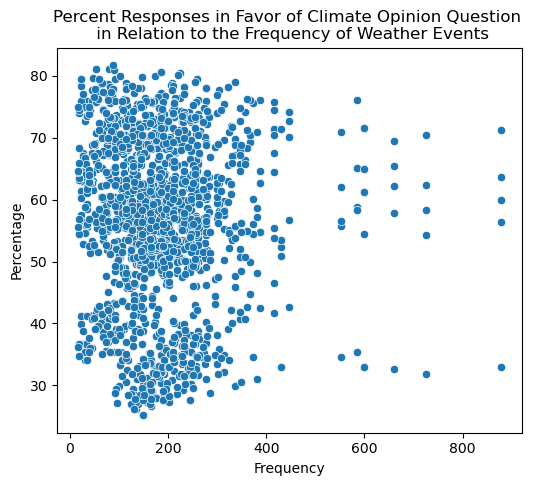

In [39]:
fig, ax = plt.subplots(1, 1, figsize=(6, 5))

sns.scatterplot(
    event_count_merged, 
    x = "COUNT", 
    y = "percentage"
).set(
    title='Percent Responses in Favor of Climate Opinion Question \n in Relation to the Frequency of Weather Events',
    xlabel = "Frequency",
    ylabel = "Percentage"
);

Vertical stripes of scatterplot might entail certian categorical variables significantly shape percent responses and frequency of extreme weather events. 
<br><br><br><br>
Is there a relationship between occurences of extreme weather events and the number of respondents that believe in climate change?
We will measure the the number of respondents that believe in climate change as the percentage that agree with the following questions:
-  is global warming is affecting the weather?  
- Are you worried about global warming? 
- Do you discuss global warming at least occasionally? 

In [40]:
# binarizes support
bin_climate = lambda x: 1 if x in ['affectweather', 'worried', 'discuss'] else 0

climate_belief = (event_count_merged
                  .assign(climate_change = events_df_merged.varname.apply(bin_climate))
                 )

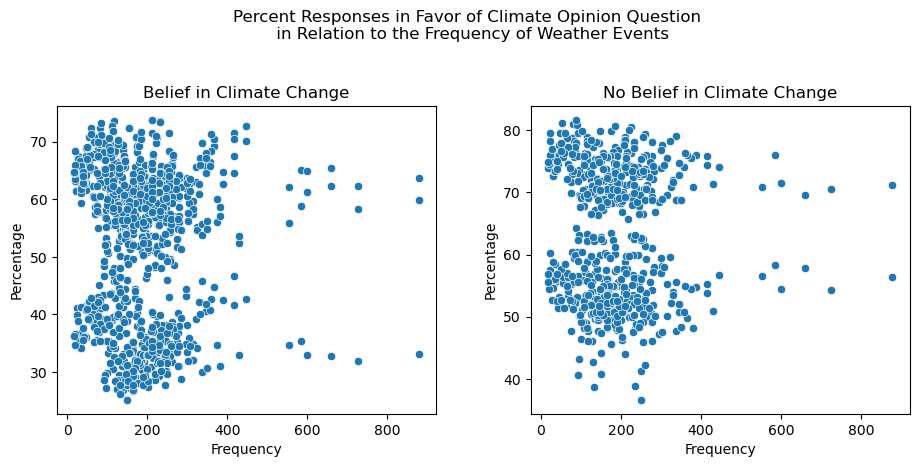

In [41]:
fig, ax = plt.subplots(1, 2, figsize=(11, 4))

#plot for belief in climate change
sns.scatterplot(
    climate_belief.query("climate_change == 1"), 
    x = "COUNT", 
    y = "percentage",
    ax = ax[0]
).set(
    title = "Belief in Climate Change",
    xlabel = "Frequency",
    ylabel = "Percentage"
)

#plot for no belief in climate change
sns.scatterplot(
    climate_belief.query("climate_change == 0"), 
    x = "COUNT", 
    y = "percentage",
    ax = ax[1]
).set(
    title = "No Belief in Climate Change",
    xlabel = "Frequency",
    ylabel = "Percentage"
)
plt.subplots_adjust(wspace=0.25)
plt.suptitle(
    'Percent Responses in Favor of Climate Opinion Question \n in Relation to the Frequency of Weather Events', 
    y=1.12
);

Both scatterplots show a mirrored pattern over the x-axis, frequency. In comparison to the the plot of the frequency of those that believe in climate change, the two mirrored patterns in the other plot contains less spread. 

### Outliers

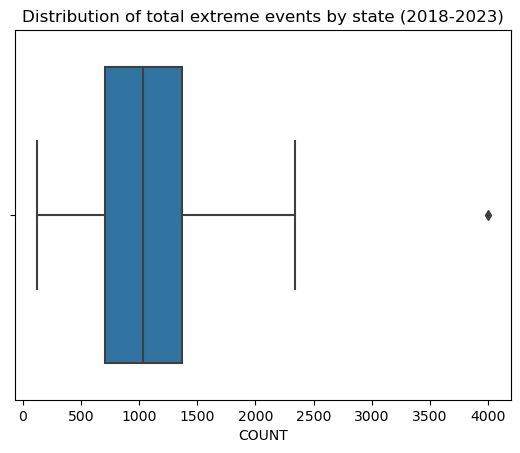

In [42]:
count_sum = event_count_df.groupby('STATE').sum(numeric_only=True)
sns.boxplot(data=count_sum, x='COUNT')
plt.title('Distribution of total extreme events by state (2018-2023)')
plt.show()

It looks like most states are between 0 and 2500 events in this period, with the exception of one. Lets look at this outlier:

In [43]:
outlier = count_sum[count_sum['COUNT'] > 2500]
outlier

,COUNT,YEAR
STATE,,
TEXAS,4001,12123


As we can see from the code above, this outlier is Texas. As Texas is the second largest state in the US by land area, this checks out. 

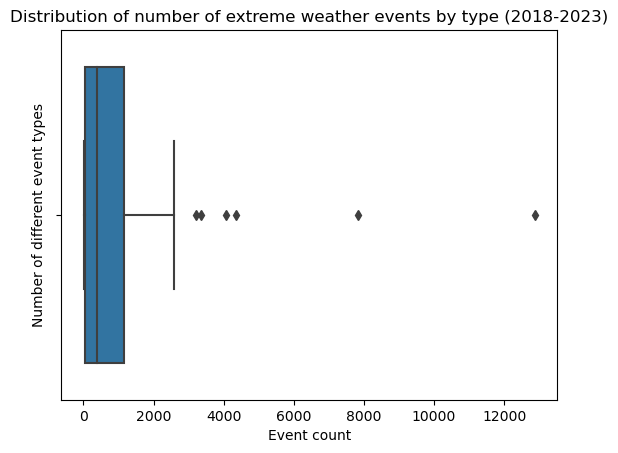

In [44]:
event_type_sum = events_df.groupby('EVENT_TYPE').count()
sns.boxplot(data=event_type_sum, x='EPISODE_ID')
plt.title('Distribution of number of extreme weather events by type (2018-2023)')
plt.xlabel('Event count')
plt.ylabel('Number of different event types')
plt.show()

This histogram suggests that there are eight events that are much more frequent than all others. Lets see what they are:

In [45]:
outliers = event_type_sum[event_type_sum['EPISODE_ID'] > 2500]
outliers

,STATE,YEAR,EPISODE_ID,EPISODE_NARRATIVE
EVENT_TYPE,,,,
Drought,2590,2590,2590,2590
Flash Flood,4074,4074,4074,4074
Flood,3356,3356,3356,3356
Hail,7836,7836,7836,7836
High Wind,4354,4354,4354,4354
Thunderstorm Wind,12867,12867,12867,12867
Winter Weather,3203,3203,3203,3203


These eight events are all known to happen quite frequently, meaning that there is reason for these to all be outliers. 

As for the Yale Climate dataset, lets look at some of the most pertinent questions and their distributions across states:

1. Average estimated percentage who somewhat/strongly agree that global warming is affecting the weather in the United States

<Axes: xlabel='percentage'>

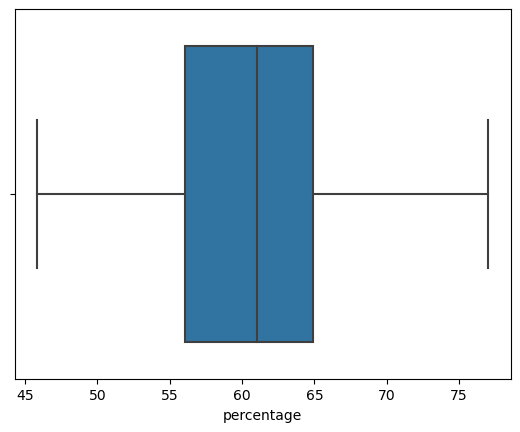

In [46]:
affect_weather = yale_climate[yale_climate['varname'] == 'affectweather'].groupby('geoname').mean(numeric_only=True)
sns.boxplot(data=affect_weather, x='percentage')

This distribution is roughly normal with no significant outliers. Lets see if other questions follow a similar distribution.

2. Average estimated percentage who are somewhat/very worried about global warming

<Axes: xlabel='percentage'>

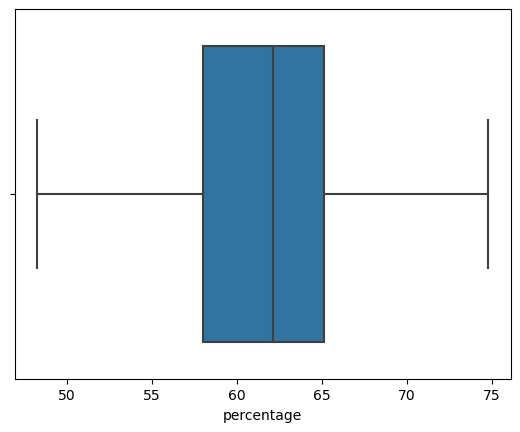

In [47]:
worried = yale_climate[yale_climate['varname'] == 'worried'].groupby('geoname').mean(numeric_only=True)
sns.boxplot(data=worried, x='percentage')

Although this distribution is slightly different, it still follows a roughly normal distribution, with the percentages still lying within 45-75%. 

3. Average estimated percentage who somewhat/strongly support funding research into renewable energy sources

<Axes: xlabel='percentage'>

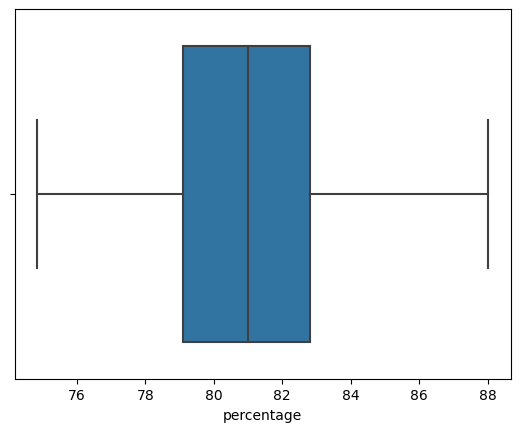

In [48]:
research = yale_climate[yale_climate['varname'] == 'fundrenewables'].groupby('geoname').mean(numeric_only=True)
sns.boxplot(data=research, x='percentage')

This distribution also contains no significant outliers, but it does tend to be more skewed right than the other distributions. It also has a much higher range than the other questions.

# Analysis

> What (if any) analyses have already been performed on this data (or another similar dataset)?<br>
> You should provide references to this<br>
> What types of analyses did you perform?

### Analysis of Variance (ANOVA) for State Covariates

To test whether the inclusion of [set of variables] in the previous regression  model significantly improves the model fit we will carry out an analysis of variance. We define the larger and smaller models to be as follows:

$$
\begin{aligned}\\
\text{Small model:} \quad y_i &= \beta_0 + \beta_1 x_1 + \beta_3 x_3 + \beta_{p-1}x_{p-1} +  \epsilon_i \\ \\
\text{Large model:} \quad y_i &= \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_3 +  \dots + \beta_p x_p + \epsilon_i \\ \\
\end{aligned}
$$

and our test statistic, $\hat F$, to be:

$$
\hat F = {\frac{\text{SS}_{Reg}(\text{Small Model}) - \text{SS}_{Reg}(\text{Big Model})}{\Delta \text{df}} \Bigg / {\frac{\text{SS}_{Res}(\text{Big Model})}{\text{df}_{Res}(\text{Big Model})}}} \\
$$

We carry out this test at a significance level of, $\alpha = 0.01$.

In [49]:
# small_formula = f'np.log({response}) ~ wfood + wother + age + children'
# big_formula = f'np.log({response}) ~ wfood + wother + wcloth + wtrans +  age + children'

In [50]:
# small_model = smf.ols(small_formula, data=df).fit()
# big_model = smf.ols(big_formula, data=df).fit()

# anova_table = sm.stats.anova_lm(small_model, big_model)
# print(anova_table)

Looking at the ANOVA table, the pvalue of our test is calculated to be:

In [51]:
# (anova_table['Pr(>F)'].values[1]

At a significance level of $\alpha = 0.01$ we come to conclusion that we ___ the null hypothesis that the inclusion of the defined additional covariates does not improve model fit. Hence, there is (in)sufficient evidence that the addition of X, Y, Z improves the model fit for predicting the response variable of A. 

### Analysis of Variance (ANOVA) for Weather Covariates

To test whether the inclusion of [set of variables] in the previous regression  model significantly improves the model fit we will carry out an analysis of variance. We define the larger and smaller models to be as follows:

$$
\begin{aligned}\\
\text{Small model:} \quad y_i &= \beta_0 + \beta_1 x_1 + \beta_3 x_3 + \beta_{p-1}x_{p-1} +  \epsilon_i \\ \\
\text{Large model:} \quad y_i &= \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_3 +  \dots + \beta_p x_p + \epsilon_i \\ \\
\end{aligned}
$$

and our test statistic, $\hat F$, to be:

$$
\hat F = {\frac{\text{SS}_{Reg}(\text{Small Model}) - \text{SS}_{Reg}(\text{Big Model})}{\Delta \text{df}} \Bigg / {\frac{\text{SS}_{Res}(\text{Big Model})}{\text{df}_{Res}(\text{Big Model})}}} \\
$$

We carry out this test at a significance level of, $\alpha = 0.01$.

In [52]:
# small_formula = f'np.log({response}) ~ wfood + wother + age + children'
# big_formula = f'np.log({response}) ~ wfood + wother + wcloth + wtrans +  age + children'

In [53]:
# small_model = smf.ols(small_formula, data=df).fit()
# big_model = smf.ols(big_formula, data=df).fit()

# anova_table = sm.stats.anova_lm(small_model, big_model)
# print(anova_table)

Looking at the ANOVA table, the pvalue of our test is calculated to be:

In [54]:
# (anova_table['Pr(>F)'].values[1]

At a significance level of $\alpha = 0.01$ we come to conclusion that we ___ the null hypothesis that the inclusion of the defined additional covariates does not improve model fit. Hence, there is (in)sufficient evidence that the addition of X, Y, Z improves the model fit for predicting the response variable of A. 

# Discussion and Conclusion

> How do you interpret the results from these analyses?
> What are some potential limitations and shortcoming of your analyses?